In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error,mean_squared_error
import seaborn as sns
import missingno as msno
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [76]:
air = pd.read_csv("air.csv")

In [77]:

air = air.rename(columns={"PM2.5 (ug/m3)": "y"})
series = air['y']

In [78]:
air.head()


,From Date,To Date,y,PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C)
0,2016-07-01 10:00:00,2016-07-01 11:00:00,10.67,39.0,17.67,39.2,32.33,7.07,6.60,0.48,...,33.43,71.67,2.30,226.33,123.67,NaN,-0.1,0.1,0.0,23.05
1,2016-07-01 11:00:00,2016-07-01 12:00:00,2.00,39.0,20.50,41.9,35.80,7.40,NaN,0.49,...,33.70,70.00,2.50,223.00,186.00,NaN,-0.1,0.1,0.0,NaN
2,2016-07-01 12:00:00,2016-07-01 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-01 13:00:00,2016-07-01 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-01 14:00:00,2016-07-01 15:00:00,20.50,50.0,15.40,43.6,32.78,6.35,6.38,0.47,...,33.57,63.50,1.88,223.00,240.50,NaN,-0.1,0.1,0.0,NaN


In [79]:
air.shape

(59150, 23)

In [80]:
air.describe

<bound method NDFrame.describe of                  From Date              To Date      y  PM10 (ug/m3)  \
0      2016-07-01 10:00:00  2016-07-01 11:00:00  10.67         39.00   
1      2016-07-01 11:00:00  2016-07-01 12:00:00   2.00         39.00   
2      2016-07-01 12:00:00  2016-07-01 13:00:00    NaN           NaN   
3      2016-07-01 13:00:00  2016-07-01 14:00:00    NaN           NaN   
4      2016-07-01 14:00:00  2016-07-01 15:00:00  20.50         50.00   
...                    ...                  ...    ...           ...   
59145  2023-03-31 19:00:00  2023-03-31 20:00:00  53.00         70.25   
59146  2023-03-31 20:00:00  2023-03-31 21:00:00  58.50         88.50   
59147  2023-03-31 21:00:00  2023-03-31 22:00:00  44.25         80.50   
59148  2023-03-31 22:00:00  2023-03-31 23:00:00  31.25         59.00   
59149  2023-03-31 23:00:00  2023-04-01 00:00:00  26.00         53.00   

       NO (ug/m3)  NO2 (ug/m3)  NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  \
0           17.67        39.20

In [81]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59150 entries, 0 to 59149
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        59150 non-null  object 
 1   To Date          59150 non-null  object 
 2   y                54323 non-null  float64
 3   PM10 (ug/m3)     54450 non-null  float64
 4   NO (ug/m3)       55153 non-null  float64
 5   NO2 (ug/m3)      55100 non-null  float64
 6   NOx (ppb)        55315 non-null  float64
 7   NH3 (ug/m3)      53564 non-null  float64
 8   SO2 (ug/m3)      54285 non-null  float64
 9   CO (mg/m3)       54673 non-null  float64
 10  Ozone (ug/m3)    54567 non-null  float64
 11  Benzene (ug/m3)  55213 non-null  float64
 12  Toluene (ug/m3)  55213 non-null  float64
 13  Temp (degree C)  55113 non-null  float64
 14  RH (%)           55281 non-null  float64
 15  WS (m/s)         55299 non-null  float64
 16  WD (deg)         54656 non-null  float64
 17  SR (W/mt2)  

In [82]:
air.isna().sum()

From Date              0
To Date                0
y                   4827
PM10 (ug/m3)        4700
NO (ug/m3)          3997
NO2 (ug/m3)         4050
NOx (ppb)           3835
NH3 (ug/m3)         5586
SO2 (ug/m3)         4865
CO (mg/m3)          4477
Ozone (ug/m3)       4583
Benzene (ug/m3)     3937
Toluene (ug/m3)     3937
Temp (degree C)     4037
RH (%)              3869
WS (m/s)            3851
WD (deg)            4494
SR (W/mt2)          4561
BP (mmHg)          57949
VWS (m/s)           3809
Xylene (ug/m3)      3950
RF (mm)             3865
AT (degree C)       4063
dtype: int64

In [83]:
air.isna().mean() * 100

From Date           0.000000
To Date             0.000000
y                   8.160609
PM10 (ug/m3)        7.945900
NO (ug/m3)          6.757396
NO2 (ug/m3)         6.846999
NOx (ppb)           6.483516
NH3 (ug/m3)         9.443787
SO2 (ug/m3)         8.224852
CO (mg/m3)          7.568893
Ozone (ug/m3)       7.748098
Benzene (ug/m3)     6.655959
Toluene (ug/m3)     6.655959
Temp (degree C)     6.825021
RH (%)              6.540997
WS (m/s)            6.510566
WD (deg)            7.597633
SR (W/mt2)          7.710904
BP (mmHg)          97.969569
VWS (m/s)           6.439560
Xylene (ug/m3)      6.677937
RF (mm)             6.534235
AT (degree C)       6.868977
dtype: float64

In [84]:
air.ffill(inplace=True)


In [85]:
air.isna().sum()

From Date             0
To Date               0
y                     0
PM10 (ug/m3)          0
NO (ug/m3)            0
NO2 (ug/m3)           0
NOx (ppb)             0
NH3 (ug/m3)           0
SO2 (ug/m3)           0
CO (mg/m3)            0
Ozone (ug/m3)         0
Benzene (ug/m3)       0
Toluene (ug/m3)       0
Temp (degree C)       0
RH (%)                0
WS (m/s)              0
WD (deg)              0
SR (W/mt2)            0
BP (mmHg)          5482
VWS (m/s)             0
Xylene (ug/m3)        0
RF (mm)               0
AT (degree C)         0
dtype: int64

Now no Na'S

Lets Explore

In [86]:
# Convert column to datetime
air['From Date'] = pd.to_datetime(air['From Date'])

# Set as index
air.set_index('From Date', inplace=True)

In [87]:
# Now it will work
air['hour'] = air.index.hour

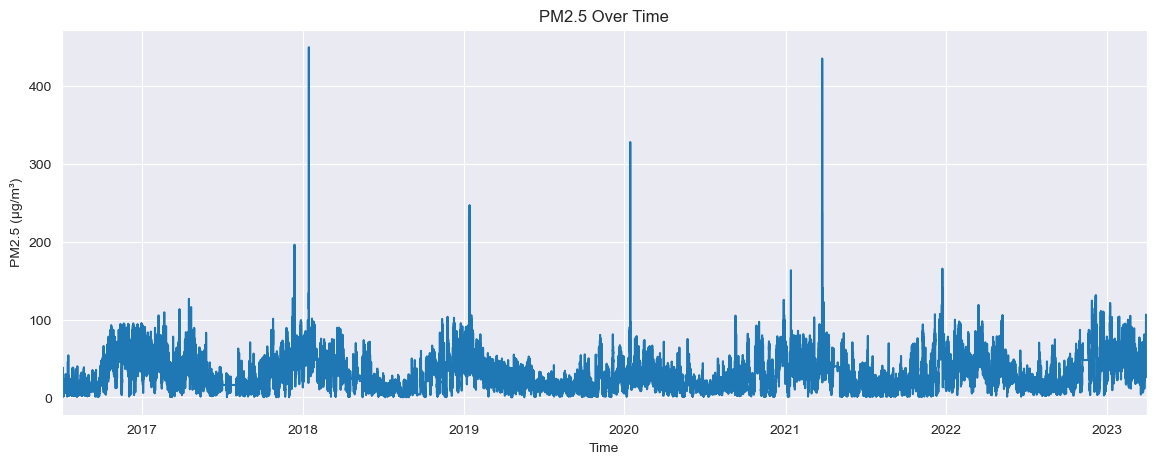

In [88]:
plt.figure(figsize=(14,5))
air['y'].plot()
plt.title('PM2.5 Over Time')
plt.xlabel('Time')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.show()

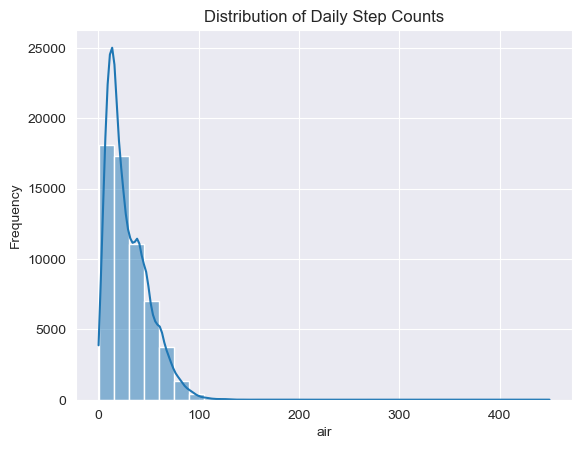

In [104]:
sns.histplot(air["y"], bins=30, kde=True)
plt.title("Distribution of Daily Step Counts")
plt.xlabel("air")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

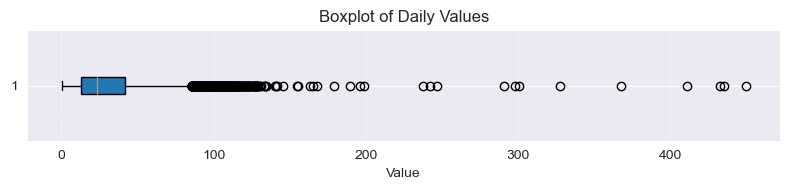

In [89]:
plt.figure(figsize=(8, 2))
plt.boxplot(series, vert=False, patch_artist=True)
plt.title("Boxplot of Daily Values")
plt.xlabel("Value")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [90]:
series.describe()

count    59150.000000
mean        29.317273
std         21.094135
min          0.250000
25%         13.000000
50%         23.750000
75%         42.000000
max        449.500000
Name: y, dtype: float64

seems seasonal

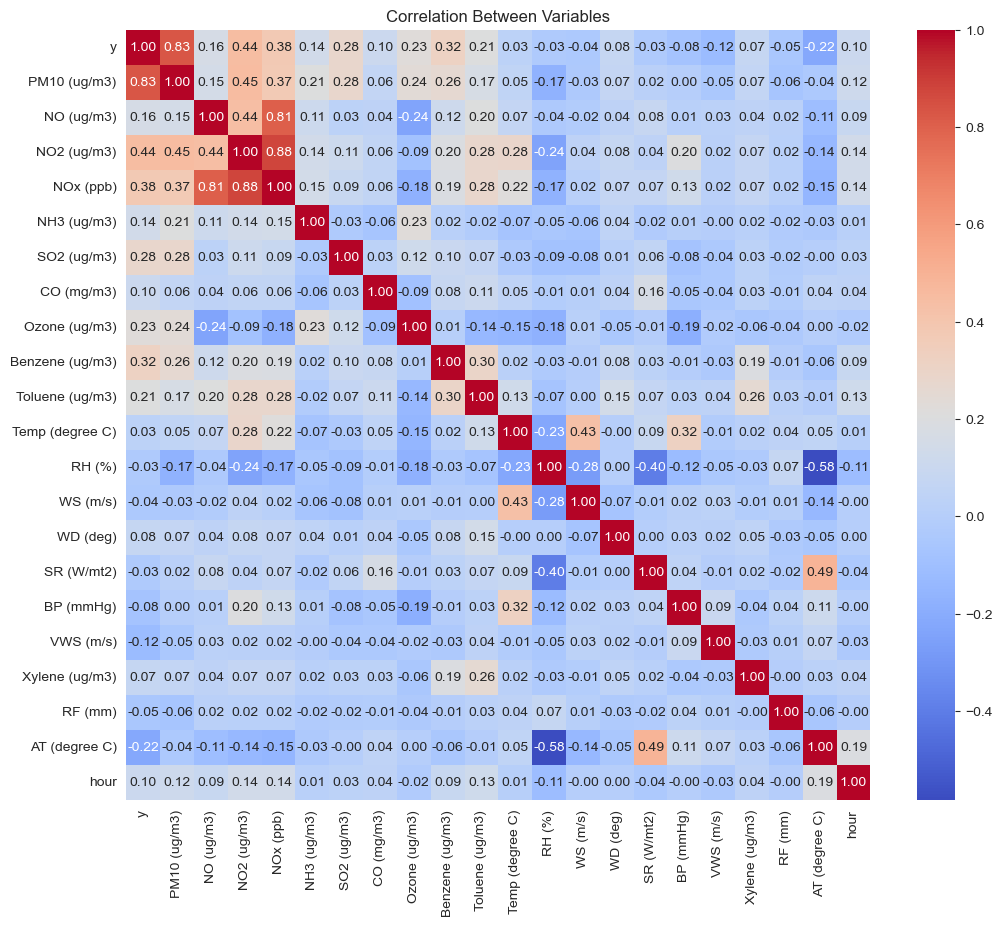

In [91]:
plt.figure(figsize=(12,10))
sns.heatmap(air.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.show()

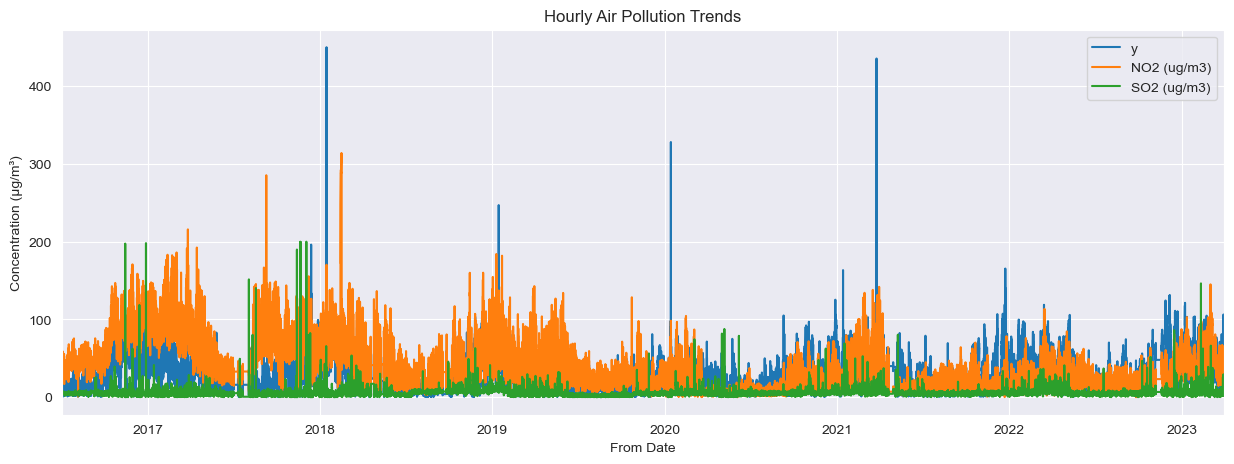

In [92]:
air[['y', 'NO2 (ug/m3)', 'SO2 (ug/m3)']].plot(figsize=(15,5))
plt.title('Hourly Air Pollution Trends')
plt.ylabel('Concentration (µg/m³)')
plt.grid(True)
plt.show()

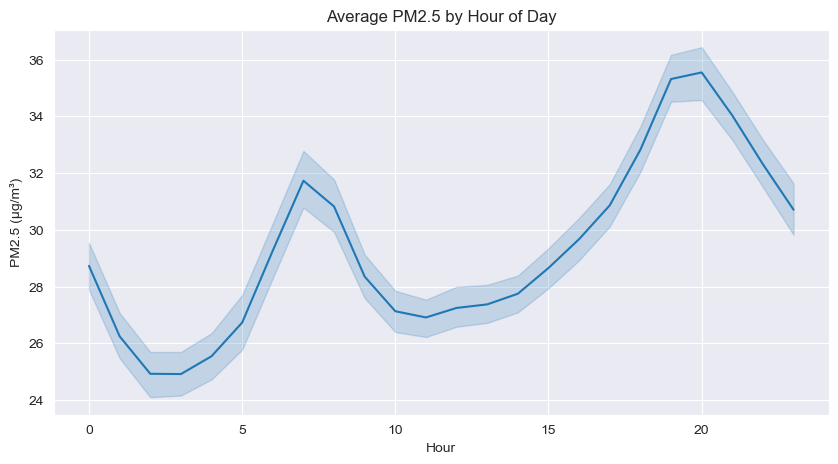

In [93]:
air['hour'] = air.index.hour

plt.figure(figsize=(10,5))
sns.lineplot(data=air, x='hour', y='y')
plt.title('Average PM2.5 by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.show()

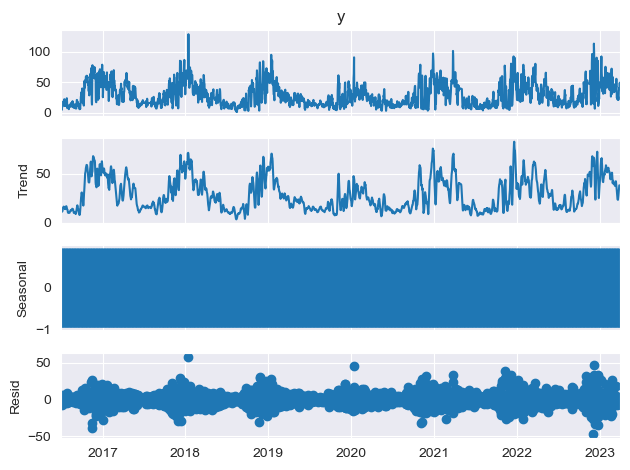

In [94]:
# Drop NA and use daily averages for cleaner signal
daily_avg = air['y'].dropna().resample('D').mean()
result = seasonal_decompose(daily_avg, model='additive')

result.plot()
plt.show()

In [95]:

series = air['y'].dropna()
adf_result = adfuller(series)

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -13.266576397745588
p-value: 8.195584459607478e-25


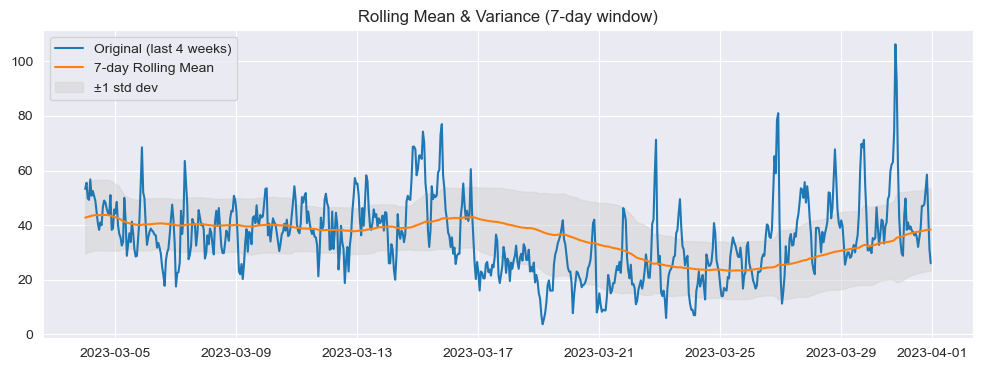

In [96]:
# Rolling Mean & Variance (7-day window = 168 hours)
series = air['y']
rolling_mean = series.rolling(window=168).mean()
rolling_var  = series.rolling(window=168).var()

plt.figure(figsize=(12,4))
plt.plot(series[-168*4:], label='Original (last 4 weeks)')
plt.plot(rolling_mean[-168*4:], label='7-day Rolling Mean')
plt.fill_between(
    rolling_mean[-168*4:].index,
    rolling_mean[-168*4:] - np.sqrt(rolling_var[-168*4:]),
    rolling_mean[-168*4:] + np.sqrt(rolling_var[-168*4:]),
    color='lightgray',
    alpha=0.5,
    label='±1 std dev'
)
plt.legend()
plt.title('Rolling Mean & Variance (7-day window)')
plt.show()


<Figure size 1200x400 with 0 Axes>

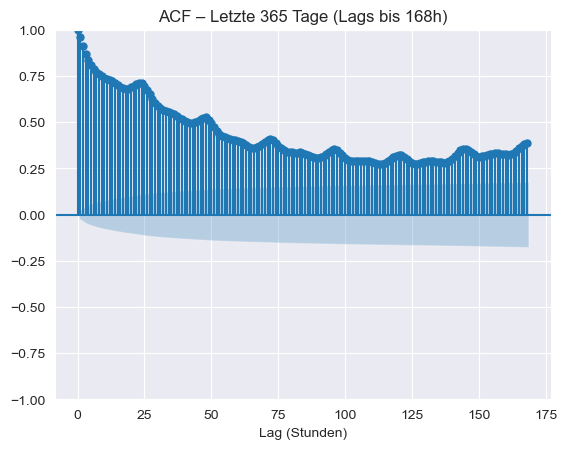

<Figure size 1200x400 with 0 Axes>

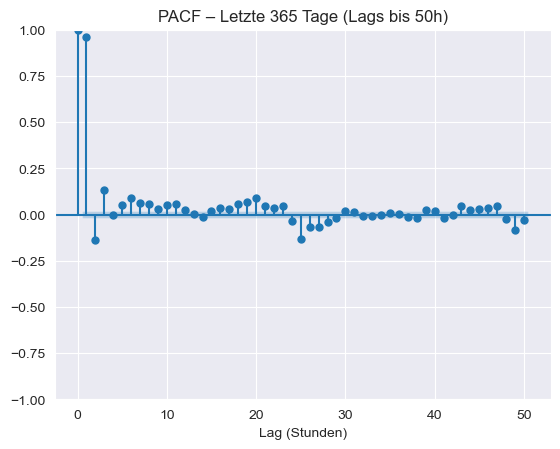

In [97]:


# 1) Subset: z.B. letzte 365 Tage stündlich
hourly = air['y'].last('365D')  # alternativ .tail(8760)

# 2) ACF-Plot (Lags bis 168 Stunden ≈ 1 Woche)
plt.figure(figsize=(12,4))
plot_acf(hourly.dropna(), lags=168, alpha=0.05)
plt.title('ACF – Letzte 365 Tage (Lags bis 168h)')
plt.xlabel('Lag (Stunden)')
plt.show()

# 3) PACF-Plot (Lags bis z.B. 50)
plt.figure(figsize=(12,4))
plot_pacf(hourly.dropna(), lags=50, alpha=0.05, method='ywm')
plt.title('PACF – Letzte 365 Tage (Lags bis 50h)')
plt.xlabel('Lag (Stunden)')
plt.show()


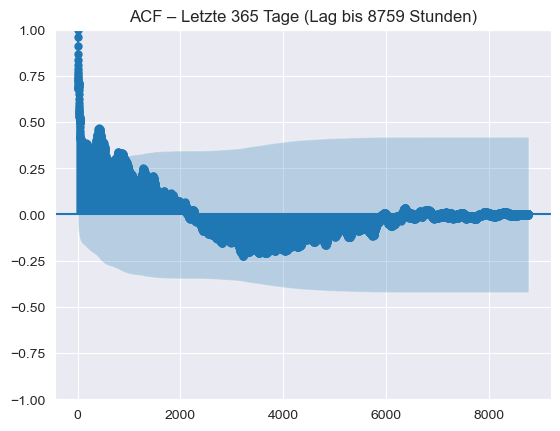

In [98]:
# auf 8760-1 setzen, wenn Ihre Serie 8761 Punkte hat
plot_acf(hourly, lags=8760-1)
plt.title("ACF – Letzte 365 Tage (Lag bis 8759 Stunden)")
plt.show()


## Zusammenfassung der Vor-Analyse

1. **Stationarität (ADF-Test)**  
   - ADF Statistic: –13.27, p-value ≈ 8.2 × 10⁻²⁵ → **Serie ist stationär**  
   - Bedeutet: Mittelwert und Varianz bleiben über Zeit stabil, kein zusätzliches Trend-Differencing nötig.

2. **Kurzfristige Autokorrelation (ACF/PACF bis 168 h)**  
   - **ACF** fällt langsam ab, kein scharfer Peak bei Lag 24 h oder 168 h → **keine dominante Tages- oder Wochen-Saisonalität**  
   - **PACF** zeigt nur einen signifikanten Spike bei Lag 1 → typisch für einen **AR(1)**-Prozess

3. **Langfristige Autokorrelation (ACF bis ≈ 8760 h)**  
   - Kein klarer Peak bei Lag ≈ 8760 h → **kein scharfer Jahres-Zyklus**  
   - Sanftes Abfallen spricht weiter für autoregressive Komponenten ohne starke Jahres-SAR-Terme

---

###  



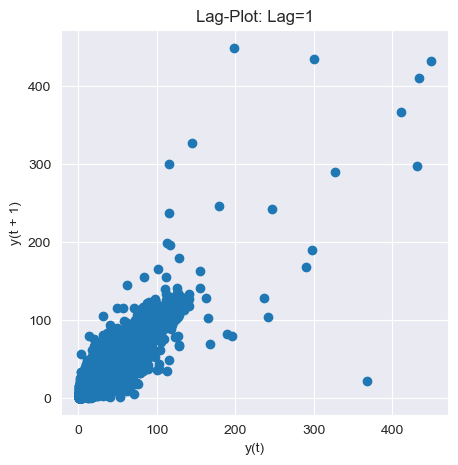

In [99]:
plt.figure(figsize=(5,5))
lag_plot(air['y'], lag=1)
plt.title('Lag-Plot: Lag=1')
plt.show()

01:41:24 - cmdstanpy - INFO - Chain [1] start processing
01:41:58 - cmdstanpy - INFO - Chain [1] done processing


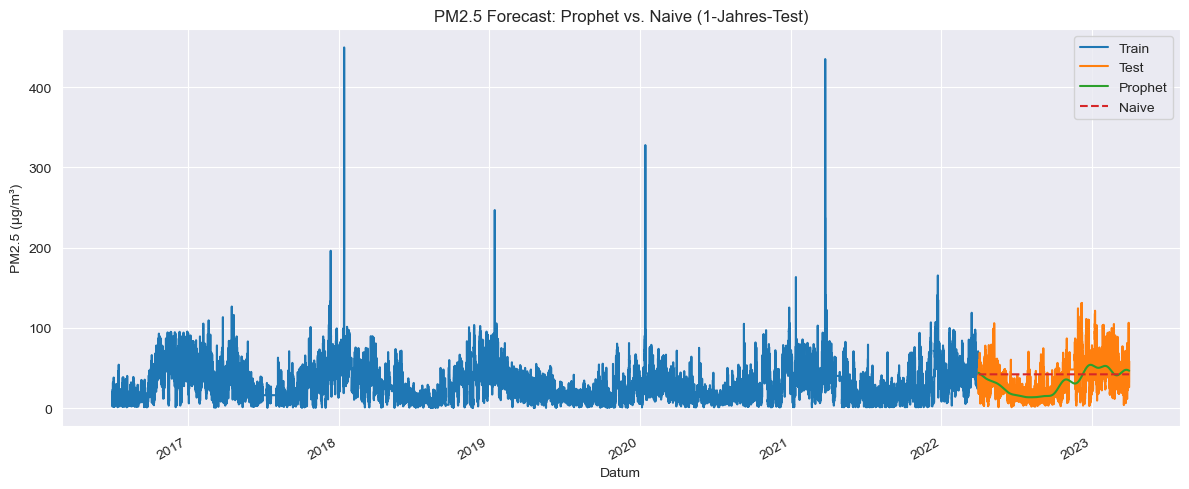

Prophet – MAE:  13.30, RMSE: 18.26
Naive   – MAE:  19.20, RMSE: 22.96


In [100]:
import warnings
warnings.filterwarnings("ignore")

# 1) DataFrame für Prophet (y-Spalte bereits vorhanden, Index ist 'From Date')
df = (
    air
    .reset_index()[['From Date', 'y']]
    .rename(columns={'From Date': 'ds'})
    .dropna()
)

# 2) Harter 1-Jahres-Split (letzte 8760 Stunden)
horizon = 8760
train_df = df.iloc[:-horizon].copy()
test_df  = df.iloc[-horizon:].copy()

# 3) Prophet-Modell (nur Jahres-Saisonalität)
m = Prophet(
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=True
)
m.fit(train_df)

# 4) Zukunfts-DataFrame für 1 Jahr (8760 Stunden)
future   = m.make_future_dataframe(periods=horizon, freq='H')
forecast = m.predict(future)

# 5) Merge Test-Set mit Forecast
eval_df = test_df[['ds','y']].merge(
    forecast[['ds','yhat']],
    on='ds',
    how='left'
)

# 6) Plot: Train, Test, Prophet vs. Naive
last_val   = train_df['y'].iloc[-1]
naive_pred = [last_val] * len(eval_df)

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(train_df['ds'], train_df['y'],       label='Train', color='C0')
ax.plot(eval_df['ds'],    eval_df['y'],      label='Test',  color='C1')
ax.plot(eval_df['ds'],    eval_df['yhat'],   label='Prophet', color='C2')
ax.plot(eval_df['ds'],    naive_pred,        label='Naive',   color='C3', linestyle='--')
ax.set_title("PM2.5 Forecast: Prophet vs. Naive (1-Jahres-Test)")
ax.set_xlabel("Datum")
ax.set_ylabel("PM2.5 (µg/m³)")
ax.legend()
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# 7) Metriken
y_true     = eval_df['y'].values
y_prophet  = eval_df['yhat'].values
y_naive    = naive_pred

mae_prop   = mean_absolute_error(y_true, y_prophet)
rmse_prop  = np.sqrt(mean_squared_error(y_true, y_prophet))
mae_naive  = mean_absolute_error(y_true, y_naive)
rmse_naive = np.sqrt(mean_squared_error(y_true, y_naive))

print(f"Prophet – MAE:  {mae_prop:.2f}, RMSE: {rmse_prop:.2f}")
print(f"Naive   – MAE:  {mae_naive:.2f}, RMSE: {rmse_naive:.2f}")


In [101]:
# --- Setup eval_df und naive_pred neu ---
eval_df = test_df[['ds','y']].merge(
    forecast[['ds','yhat']],
    on='ds', how='left'
)

last_val   = train_df['y'].iloc[-1]
naive_pred = [last_val] * len(eval_df)


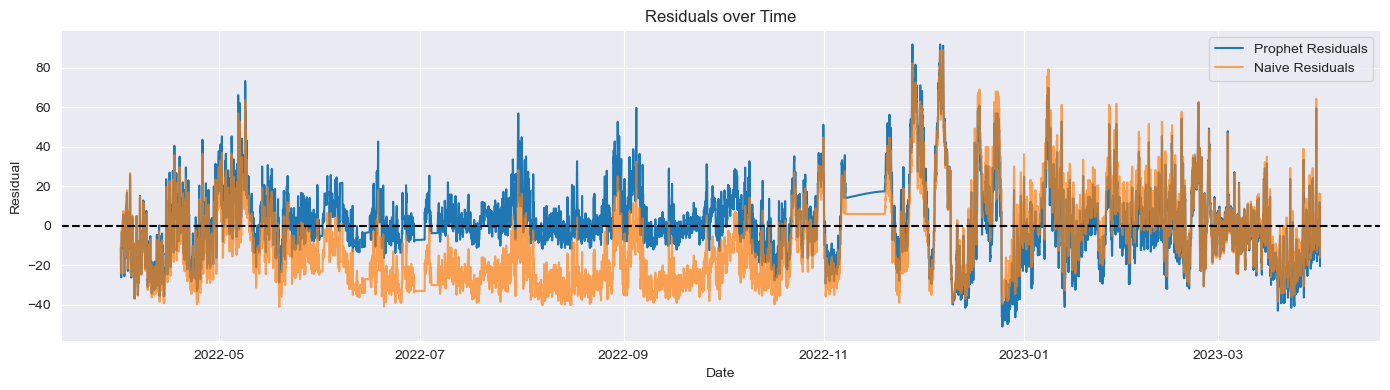

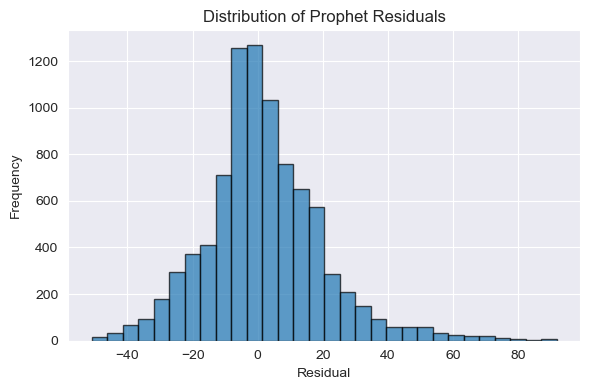

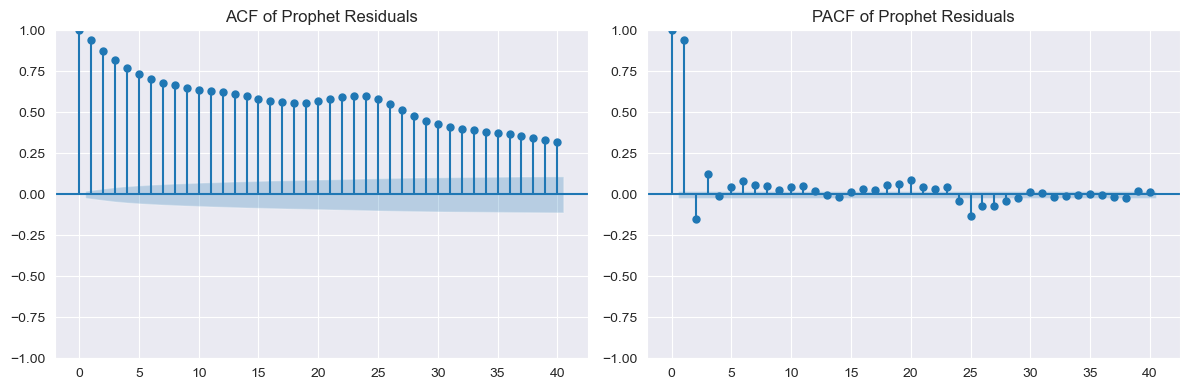

Ljung-Box test (Prophet residuals):
          lb_stat  lb_pvalue
10   49888.022159        0.0
20   80148.610551        0.0
40  117819.719430        0.0


In [102]:
# 1) Compute residuals
eval_df['res_prophet'] = eval_df['y'] - eval_df['yhat']
eval_df['res_naive']   = eval_df['y'] - naive_pred

# 2) Plot residual time series
plt.figure(figsize=(14,4))
plt.plot(eval_df['ds'], eval_df['res_prophet'], label='Prophet Residuals')
plt.plot(eval_df['ds'], eval_df['res_naive'],   label='Naive Residuals', alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals over Time")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.tight_layout()
plt.show()

# 3) Histogram of Prophet residuals
plt.figure(figsize=(6,4))
plt.hist(eval_df['res_prophet'], bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribution of Prophet Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 4) ACF and PACF of Prophet residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2, figsize=(12,4))
plot_acf(eval_df['res_prophet'], lags=40, ax=axes[0], title="ACF of Prophet Residuals")
plot_pacf(eval_df['res_prophet'], lags=40, ax=axes[1], title="PACF of Prophet Residuals")
plt.tight_layout()
plt.show()

# 5) Ljung-Box test for Prophet residuals
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(eval_df['res_prophet'], lags=[10, 20, 40], return_df=True)
print("Ljung-Box test (Prophet residuals):")
print(lb_test)


Prophet verbessert bereits die Fehlerkennzahlen gegenüber Naive, fängt Jahres-Saisonalität und Trend gut ab.

Aber die Residuen sind keineswegs weißes Rauschen: starke Autokorrelationen und Cluster deuten darauf hin, dass das Modell noch systematische Muster nicht erfasst hat (z. B. Tages- oder Wochenseffekte, changepoints, externe Regressoren).

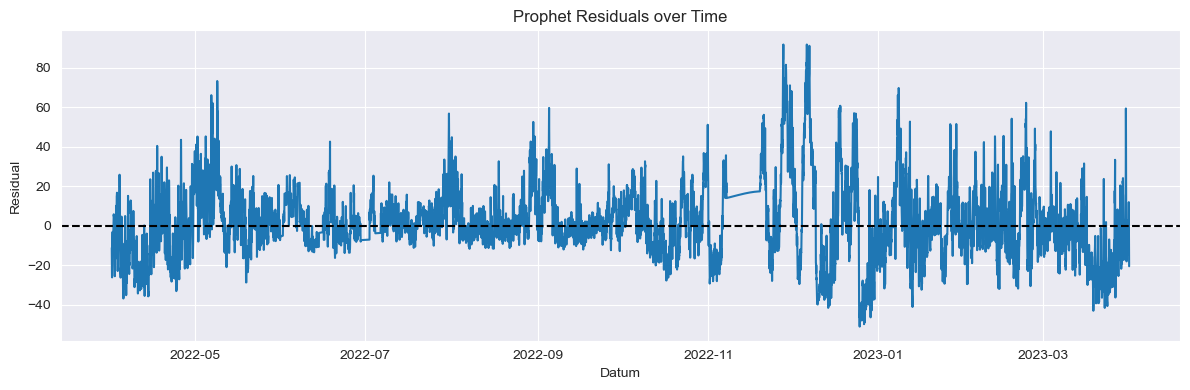

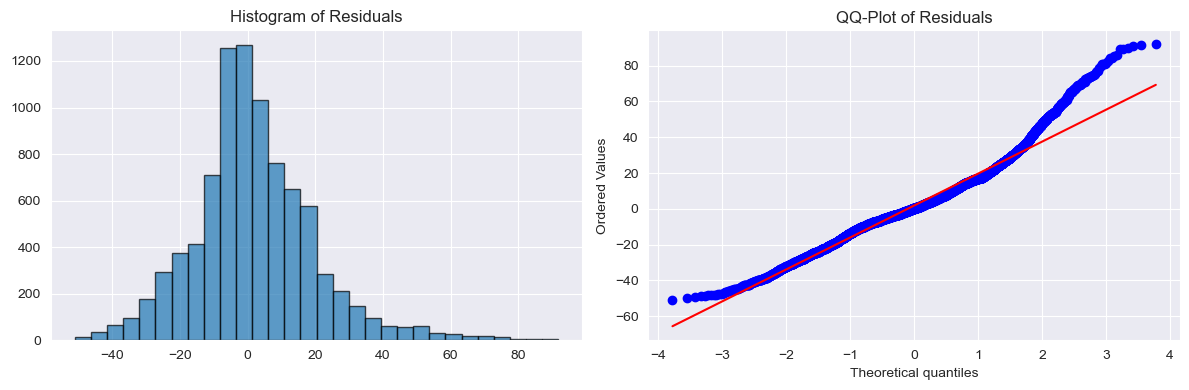

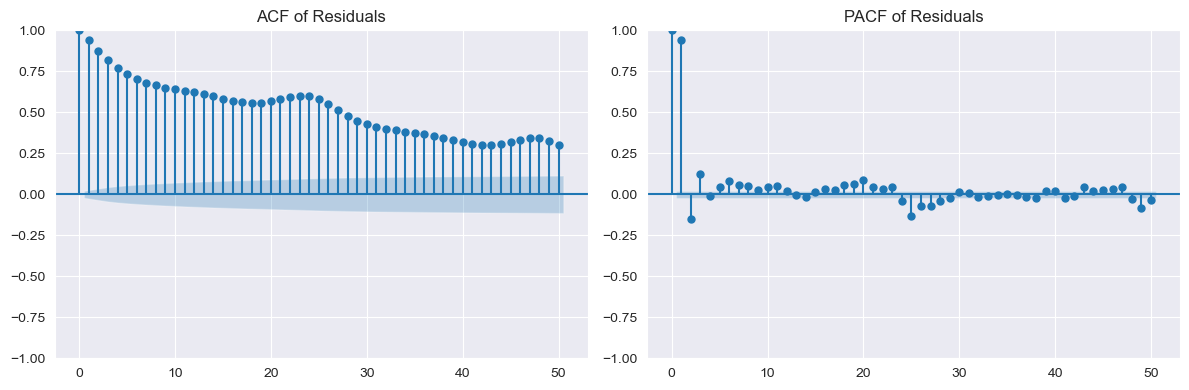

Ljung-Box test:
          lb_stat  lb_pvalue
10   49888.022159        0.0
20   80148.610551        0.0
50  126746.840523        0.0
Shapiro-Wilk: W=0.9652, p-value=0.0000


In [103]:
# --- 1) Residuen berechnen ---
eval_df['res'] = eval_df['y'] - eval_df['yhat']

# --- 2) Zeitreihen-Plot der Residuen ---
plt.figure(figsize=(12,4))
plt.plot(eval_df['ds'], eval_df['res'], color='C0')
plt.axhline(0, color='black', linestyle='--')
plt.title("Prophet Residuals over Time")
plt.xlabel("Datum")
plt.ylabel("Residual")
plt.tight_layout()
plt.show()

# --- 3) Histogramm und QQ-Plot (Normalverteilung prüfen) ---
import scipy.stats as stats

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(eval_df['res'], bins=30, edgecolor='black', alpha=0.7)
plt.title("Histogram of Residuals")

plt.subplot(1,2,2)
stats.probplot(eval_df['res'], dist="norm", plot=plt)
plt.title("QQ-Plot of Residuals")

plt.tight_layout()
plt.show()

# --- 4) ACF/PACF der Residuen (Unkorreliertheit prüfen) ---
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2, figsize=(12,4))
plot_acf(eval_df['res'], lags=50, ax=axes[0], title="ACF of Residuals")
plot_pacf(eval_df['res'], lags=50, ax=axes[1], title="PACF of Residuals")
plt.tight_layout()
plt.show()

# --- 5) Ljung-Box Test auf Weißes Rauschen ---
from statsmodels.stats.diagnostic import acorr_ljungbox

lb = acorr_ljungbox(eval_df['res'], lags=[10, 20, 50], return_df=True)
print("Ljung-Box test:")
print(lb)

# --- 6) Shapiro-Wilk Test auf Normalität ---
w, pvalue = stats.shapiro(eval_df['res'])
print(f"Shapiro-Wilk: W={w:.4f}, p-value={pvalue:.4f}")


Keine weißen Rauschen
Weder die visuelle Prüfung (Zeitreihen‐Plot, ACF/PACF) noch formale Tests (Ljung‐Box, Shapiro‐Wilk) sprechen dafür, dass die Residuen komplett „zufällig“ und unkorreliert sind.

Modell‐Unvollständigkeit
Die verbliebenen Autokorrelationen und Heavy‐Tail‐Residuen zeigen, dass Prophet trotz Jahres‐Saisonalität noch systematische Muster (z. B. kürzere Saisonalitäten, externe Einflüsse oder nichtlineare Effekte) nicht abbildet.
Das heißt: Prophet (Yearly-only) fängt das grobe Jahresmuster zwar ab, lässt aber noch systematische Strukturen übrig. Um wirklich ein „weißes Rauschen“ im Residuum zu bekommen, sollten wir jetzt gezielt diese verbleibenden Muster modellieren.
Was nun?ETS und große s-SARIMA sind für unseren Fall keine gute Wahl (keine Daily/Weekly-Seasonality, numerische Instabilität über 8760 h).
Auto-ARIMA (ohne Saison) ist technisch möglich, aber lässt den Jahreszyklus weg.
Unser Prophet-Jahresmodell plus kleine AR(1)-Nachbearbeitung auf den Residuen ist die zielgerichtetste Lösung für einen 1-Jahres-Forecast auf stündlicher Auflösung.

